In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(ggplot2)
    library(SeuratDisk)
    library(edgeR)
}))
options(timeout=10000)

In [2]:
#setwd("/home/vsevim/prj/workflows/ckd/secondary/")

In [3]:
so <- readRDS("/home/vsevim/prj/sandbox/edgeR_data/SeuratObject_NormTotalSub.rds")

In [4]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,group,integrated_snn_res.0.05,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<fct>,<fct>
N_0019_total_AAACCTGAGGGCTCTC-1,N,7886,2419,N_0019_total,1,1
N_0019_total_AAACCTGCACCTCGGA-1,N,1031,508,N_0019_total,0,0
N_0019_total_AAACCTGGTACCGCTG-1,N,2306,1018,N_0019_total,0,0
N_0019_total_AAACCTGGTTAAGACA-1,N,3806,1323,N_0019_total,3,3
N_0019_total_AAACCTGTCTAGCACA-1,N,8569,2411,N_0019_total,0,0
N_0019_total_AAACCTGTCTCGGACG-1,N,5322,1750,N_0019_total,0,0


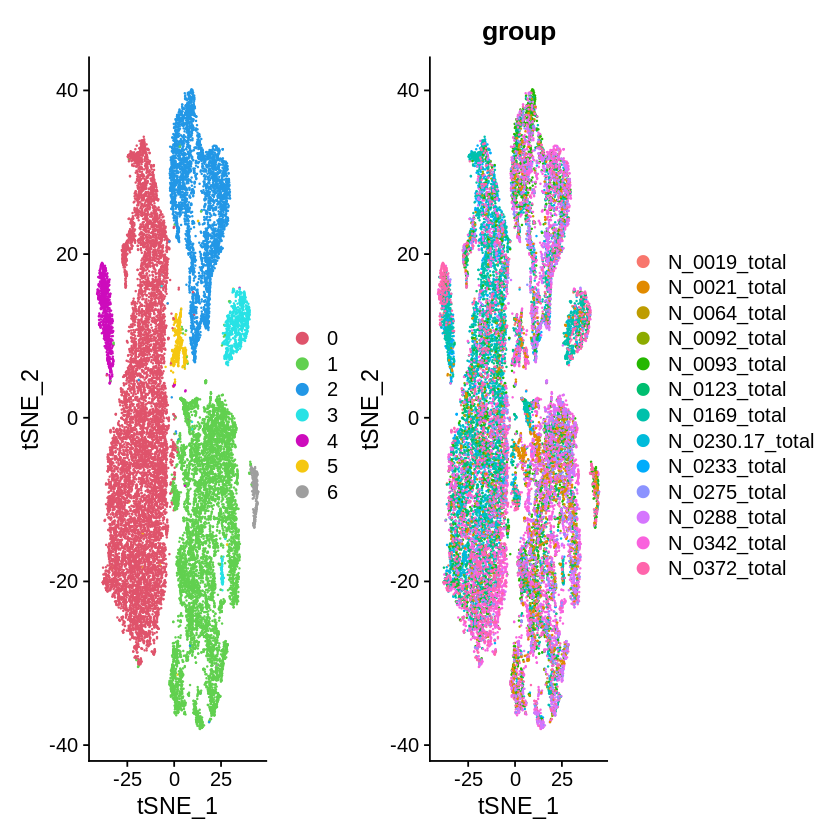

In [5]:
p1 <- Seurat::DimPlot(so, reduction="tsne", cols=2:8)
p2 <- Seurat::DimPlot(so, reduction="tsne", group.by="group")
p1 | p2

In [6]:
y <- Seurat2PB(so, sample="group", cluster="seurat_clusters")
dim(y)
head(y$samples, n=10L)
summary(y$samples$lib.size)

[1] 13527    89

,group,lib.size,norm.factors,sample,cluster
,<fct>,<dbl>,<dbl>,<chr>,<chr>
N_0019_total_cluster0,1,4168771,1,N_0019_total,0
N_0019_total_cluster1,1,5416503,1,N_0019_total,1
N_0019_total_cluster2,1,963420,1,N_0019_total,2
N_0019_total_cluster3,1,365930,1,N_0019_total,3
N_0019_total_cluster4,1,96851,1,N_0019_total,4
N_0019_total_cluster5,1,600327,1,N_0019_total,5
N_0019_total_cluster6,1,112039,1,N_0019_total,6
N_0021_total_cluster0,1,87788,1,N_0021_total,0
N_0021_total_cluster1,1,1352187,1,N_0021_total,1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     880    80816   416010  1543872  1740944 11926347 

In [7]:
keep.samples <- y$samples$lib.size > 5e4
table(keep.samples)

keep.samples
FALSE  TRUE 
   21    68 

In [8]:
y <- y[, keep.samples]

In [9]:
keep.genes <- filterByExpr(y, group=y$samples$cluster, min.count=10, min.total.count=20)
table(keep.genes)
y <- y[keep.genes, , keep=FALSE]

keep.genes
FALSE  TRUE 
 4561  8966 

In [14]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,sample,cluster
,<fct>,<dbl>,<dbl>,<chr>,<chr>
N_0019_total_cluster0,1,4129214,1.0452230,N_0019_total,0
N_0019_total_cluster1,1,5364852,1.1262989,N_0019_total,1
N_0019_total_cluster2,1,955947,0.8559033,N_0019_total,2
N_0019_total_cluster3,1,360945,0.9305793,N_0019_total,3
N_0019_total_cluster4,1,95260,1.1246942,N_0019_total,4
N_0019_total_cluster5,1,593380,1.0706418,N_0019_total,5
N_0019_total_cluster6,1,111067,1.2476325,N_0019_total,6
N_0021_total_cluster0,1,87379,1.1388730,N_0021_total,0
N_0021_total_cluster1,1,1344455,0.9667459,N_0021_total,1


In [11]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6770  0.9259  1.0429  1.0094  1.1148  1.2497 

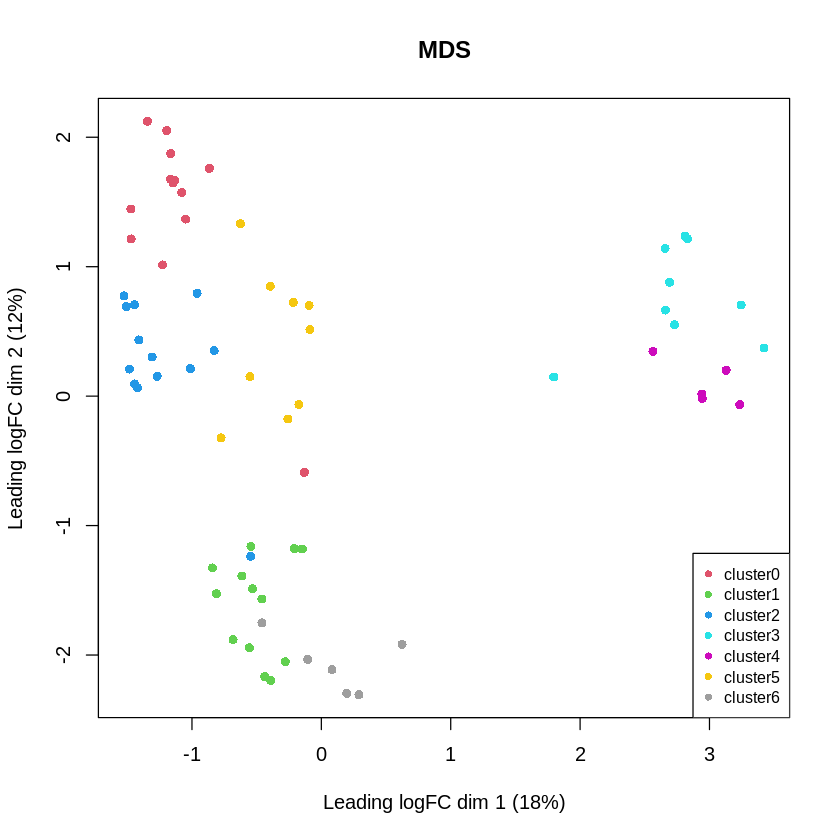

In [12]:
cluster <- as.factor(y$samples$cluster)
plotMDS(y, pch=16, col=c(2:8)[cluster], main="MDS")
legend("bottomright", legend=paste0("cluster",levels(cluster)), pch=16, col=2:8, cex=0.8)

In [13]:
donor <- factor(y$samples$sample)
design <- model.matrix(~ cluster + donor)
#colnames(design) <- gsub("donor", "", colnames(design))
#colnames(design)[1] <- "Int"
head(design)

,(Intercept),cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,donorN_0021_total,donorN_0064_total,donorN_0092_total,donorN_0093_total,donorN_0123_total,donorN_0169_total,donorN_0230.17_total,donorN_0233_total,donorN_0275_total,donorN_0288_total,donorN_0342_total,donorN_0372_total
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
donor
cluster

[1] N_0019_total    N_0019_total    N_0019_total    N_0019_total   
 [5] N_0019_total    N_0019_total    N_0019_total    N_0021_total   
 [9] N_0021_total    N_0021_total    N_0064_total    N_0064_total   
[13] N_0064_total    N_0092_total    N_0092_total    N_0092_total   
[17] N_0092_total    N_0092_total    N_0093_total    N_0093_total   
[21] N_0093_total    N_0093_total    N_0093_total    N_0093_total   
[25] N_0123_total    N_0123_total    N_0123_total    N_0123_total   
[29] N_0123_total    N_0169_total    N_0169_total    N_0169_total   
[33] N_0169_total    N_0169_total    N_0169_total    N_0169_total   
[37] N_0230.17_total N_0230.17_total N_0230.17_total N_0230.17_total
[41] N_0230.17_total N_0230.17_total N_0230.17_total N_0233_total   
[45] N_0233_total    N_0233_total    N_0233_total    N_0233_total   
[49] N_0233_total    N_0233_total    N_0275_total    N_0275_total   
[53] N_0275_total    N_0288_total    N_0288_total    N_0288_total   
[57] N_0342_total    N_0342_total    N_0342_total    N_0342_total   
[61] N_0342_total    N_0372_total    N_0372_total    N_0372_total   
[65] N_0372_total    N_0372_total    N_0372_total    N_0372_total   
13 Levels: N_0019_total N_0021_total N_0064_total N_0092_total ... N_0372_total

[1] 0 1 2 3 4 5 6 0 1 2 0 1 2 0 1 2 3 5 0 1 2 3 5 6 0 1 2 3 5 0 1 2 3 4 5 6 0 1
[39] 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 0 1 2 0 1 2 3 5 0 1 2 3 4 5 6
Levels: 0 1 2 3 4 5 6